In [1284]:
import numpy as np
import matplotlib.pyplot as plt
import astropy as astro 
import pandas as pd
#import camb as cb
%matplotlib inline

In [1285]:
from pylab import imshow
from numpy import random
from PIL import Image
from scipy.fftpack import fft, ifft 
from numpy.linalg import inv
from __future__ import division

In [1286]:
#hitsmap part 
#Hitmap=np.random.rand(500,500) #generate random array and graph 
#np.clip(Hitmap,0,1) 
Hitmap=[[0.50,0.82,0.36],[0.40,0.38,0.67],[0.66,0.80,0.33]]
print(Hitmap)

[[0.5, 0.82, 0.36], [0.4, 0.38, 0.67], [0.66, 0.8, 0.33]]


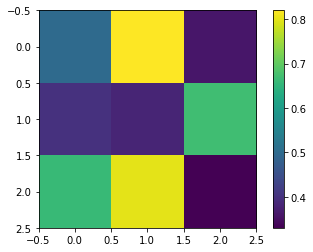

In [1287]:
plt.colorbar(imshow(Hitmap))
imshow(Hitmap)

In [1288]:
M=np.mean(Hitmap)
print(M) 
length=len(Hitmap)
print(length)

0.5466666666666666
3


In [1289]:
#Fourrier Space Amplitude

In [1290]:
#A_noise

In [1291]:
Spectrum=np.fft.fft(Hitmap) #fft of Hitmap
#Spectrum=np.fft.ifft(Hitmap) #ifft of Hitmap
#Spectrum2=np.fft.fft2(Hitmap) #fft2 of Hitmap
#Spectrumn=np.fft.fftn(Hitmap) #fftn of Hitmap
Abs=np.abs(Spectrum)
#print(Spectrum)
#print(Abs)

Inverse=inv(np.matrix(Hitmap))
#Transpose=np.transpose(Hitmap)

A_n= Inverse * Abs 
A_noise=np.abs(A_n*A_n)#squaring the amplitude
print(A_noise) 

[[1.26069216 0.1949826  0.1949826 ]
 [1.71617532 0.30791598 0.30791598]
 [1.27559241 0.198677   0.198677  ]]


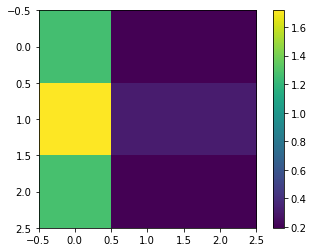

In [1292]:
plt.colorbar(imshow(A_noise))
imshow(A_noise)
#the ends have always been uniform
#there may be something wrong with the fourier transform

In [1293]:
def Noisemap(Hitmap,A_noise): 
    norm=np.random.normal(M,length)
    np.clip(norm,0,1) 
    Inital = np.abs(A_noise * norm)
    Final = np.abs(np.fft.ifft((Inital/Hitmap)))#inverse fourier transform to turn into real space
    print('Inital',Inital)
    print('Final',Final)   
    plt.colorbar(imshow(Final))
    imshow(Final)

Inital [[3.35454752 0.51882483 0.51882483]
 [4.56653244 0.81932672 0.81932672]
 [3.39419527 0.52865517 0.52865517]]
Final [[2.92766279 1.9050658  1.9050658 ]
 [4.93177658 3.25345064 3.25345064]
 [2.46850815 1.36442976 1.36442976]]


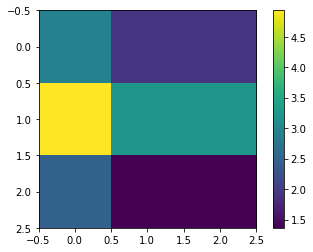

In [1294]:
Noisemap(Hitmap,A_noise)